In [1]:
import torchvision
import cv2
import matplotlib.pyplot as plt

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Example using Faster R-CNN with a ResNet-50 backbone (PyTorch)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval();

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/dai/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 65.3MB/s] 


In [3]:
img = plt.imread('../images/jungle.jpg')
img_tensor = torchvision.transforms.functional.to_tensor(img)

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [5]:
outputs = model([img_tensor])
outputs

[{'boxes': tensor([[414.7506, 214.3974, 621.4139, 294.1198],
          [ 46.5356, 231.3264, 160.5595, 393.5677],
          [ 98.1405, 233.7098, 217.2794, 348.0531],
          [255.1284, 237.6299, 342.9709, 270.3036]], grad_fn=<StackBackward0>),
  'labels': tensor([25, 24, 24, 24]),
  'scores': tensor([0.9993, 0.9992, 0.9987, 0.9966], grad_fn=<IndexBackward0>)}]

In [6]:
predictions = outputs[0]['boxes'].data.numpy()
predictions

array([[414.75064 , 214.39737 , 621.41394 , 294.11978 ],
       [ 46.535637, 231.32645 , 160.55952 , 393.56775 ],
       [ 98.140526, 233.70981 , 217.27936 , 348.05313 ],
       [255.12843 , 237.62991 , 342.97092 , 270.3036  ]], dtype=float32)

In [7]:
classes = outputs[0]['labels'].data.numpy()
classes

array([25, 24, 24, 24])

In [9]:
scores = outputs[0]['scores'].data.numpy()
scores

array([0.9993388 , 0.99915504, 0.99868137, 0.9965995 ], dtype=float32)

In [10]:
for prediction, class_id, score in zip(predictions, classes, scores):
    x1, y1, x2, y2 = prediction.astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

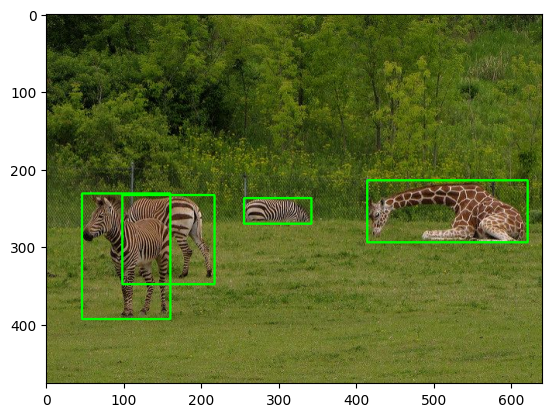

In [13]:
plt.imshow(img)